In [39]:
import pandas as pd


In [40]:
import numpy as np


In [41]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [43]:
import os
print(os.getcwd())


d:\ML Projects\Diabetis_predictor


In [44]:
import openpyxl

In [45]:
import numpy, numba, shap
print("numpy:", numpy.__version__)
print("numba:", numba.__version__)
print("shap:", shap.__version__)



numpy: 2.2.0
numba: 0.61.2
shap: 0.48.0


In [46]:
import pandas as pd

df1 = pd.read_excel("Diabetic.xlsx")
df2 = pd.read_excel("PreDiabetic.xlsx")

In [47]:
merged_df = pd.concat([df1, df2], ignore_index=True)
display(merged_df.head())

,Last_visit_date,policy_id,In RRA too,visit_id(last),Hypertension+Diabetes,Hyperlipidemia+Diabetes,Name,Age,Sex,FBS,...,Chronic_illness 3 Diabetes,Chronic_illness_4 High Blood Sugar,#visits_person,#visit_household,Village name,Street Address,Phone number,GPS_Id,Latitude,Longitude
0,2013-02-07 00:00:00,AND0010888,y,3336039.0,NaN,NaN,THIRAVIDAMANI,44.479124,F,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-31 00:00:00,AND0012586,y,3341521.0,0.0,0.0,v.manimaran,50.480493,M,205.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-16 00:00:00,AND0011301,y,3340642.0,0.0,0.0,Murugaiyan,51.909651,M,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-02 00:00:00,and0013423,y,3341479.0,0.0,0.0,Vasuki,32.479124,M,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-04-04 00:00:00,AND0010240,y,3341560.0,0.0,0.0,srirangam,72.479124,F,126.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
merged_df.shape

(541, 54)

In [49]:
merged_df.columns

Index(['Last_visit_date', 'policy_id', 'In RRA too', 'visit_id(last)',
       'Hypertension+Diabetes', 'Hyperlipidemia+Diabetes', 'Name', 'Age',
       'Sex', 'FBS', 'height', 'weight', 'BMI', 'wc', 'Hc', 'WC/HC',
       'Tobacco_current', 'Smoking_current', 'Alcohol', 'Chronic_illness 1',
       'Chronic_illness 2', 'Chronic_illness 3', 'Chronic_illness 4',
       'Education(Std)', 'Occupation', '# visits-person', '#visits_households',
       '# members_in_household', 'Amount spent', 'Village', 'Address',
       'Contact No.', 'Location_id', 'gps_id', 'latitude', 'longitude', 'RMHC',
       'Last_visit-date', 'Policy_id', 'Hypertensive+Diabetes', 'Gender',
       'Wc/Hc', 'Chronic_illness 1 Heart_Disease', 'Chronic_illness 2_High BP',
       'Chronic_illness 3 Diabetes', 'Chronic_illness_4 High Blood Sugar',
       '#visits_person', '#visit_household', 'Village name', 'Street Address',
       'Phone number', 'GPS_Id', 'Latitude', 'Longitude'],
      dtype='object')

In [50]:
selected_columns = ['Age', 'Sex', 'FBS', 'height', 'weight', 'BMI', 'wc', 'Hc', 'WC/HC',
                     'Tobacco_current', 'Smoking_current', 'Alcohol', 'Gender', 'Wc/Hc']

merged_df = merged_df[selected_columns]

display(merged_df.head())

,Age,Sex,FBS,height,weight,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Gender,Wc/Hc
0,44.479124,F,159.0,155.0,83.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN,NaN
1,50.480493,M,205.6,158.0,66.0,0.417722,92.0,96.0,0.958333,y,y,y,NaN,NaN
2,51.909651,M,240.0,160.0,72.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN,NaN
3,32.479124,M,129.0,154.0,78.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,146.0,56.0,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN,NaN


In [51]:
merged_df.columns

Index(['Age', 'Sex', 'FBS', 'height', 'weight', 'BMI', 'wc', 'Hc', 'WC/HC',
       'Tobacco_current', 'Smoking_current', 'Alcohol', 'Gender', 'Wc/Hc'],
      dtype='object')

In [52]:
merged_df = merged_df.drop(['height', 'weight'], axis=1)
display(merged_df.head())

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Gender,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN,NaN


In [53]:
merged_df.tail()

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Gender,Wc/Hc
536,49.481177,NaN,103.0,0.355705,96.0,NaN,NaN,n,NaN,NaN,F,NaN
537,65.481177,NaN,106.0,0.350318,93.0,91.0,NaN,y,n,NaN,M,1.021978
538,49.481177,NaN,110.0,0.450000,98.0,99.0,NaN,n,n,NaN,M,0.989899
539,33.875428,NaN,110.0,0.398773,84.0,94.0,NaN,n,n,NaN,M,0.893617
540,41.141684,NaN,120.0,0.484848,98.0,94.0,NaN,n,n,NaN,M,1.042553


In [54]:
merged_df.head(300)

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Gender,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,37.481177,NaN,109.0,0.362500,96.0,100.0,NaN,n,n,NaN,F,0.960000
297,62.789870,NaN,103.0,0.324503,78.0,85.0,NaN,y,n,y,M,0.917647
298,62.480493,NaN,120.0,0.297468,78.0,82.0,NaN,n,n,n,F,0.951220


In [55]:
merged_df.isnull().sum()

Age                  6
Sex                255
FBS                  6
BMI                  7
wc                   7
Hc                  73
WC/HC              295
Tobacco_current    188
Smoking_current    285
Alcohol            306
Gender             297
Wc/Hc              319
dtype: int64

In [56]:
merged_df['Sex'].fillna(merged_df['Gender'], inplace=True)
display(merged_df.head(300))

C:\Users\SAHIL BAROD\AppData\Local\Temp\ipykernel_4616\190021127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sex'].fillna(merged_df['Gender'], inplace=True)


,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Gender,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,37.481177,F,109.0,0.362500,96.0,100.0,NaN,n,n,NaN,F,0.960000
297,62.789870,M,103.0,0.324503,78.0,85.0,NaN,y,n,y,M,0.917647
298,62.480493,F,120.0,0.297468,78.0,82.0,NaN,n,n,n,F,0.951220


In [57]:
merged_df = merged_df.drop('Gender', axis=1)
display(merged_df.head())

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN


In [58]:
merged_df['WC/HC'].fillna(merged_df['Wc/Hc'], inplace=True)
display(merged_df.head())

C:\Users\SAHIL BAROD\AppData\Local\Temp\ipykernel_4616\797562561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['WC/HC'].fillna(merged_df['Wc/Hc'], inplace=True)


,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN


In [59]:
merged_df.head(300)

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Wc/Hc
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n,NaN
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y,NaN
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y,NaN
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,37.481177,F,109.0,0.362500,96.0,100.0,0.960000,n,n,NaN,0.960000
297,62.789870,M,103.0,0.324503,78.0,85.0,0.917647,y,n,y,0.917647
298,62.480493,F,120.0,0.297468,78.0,82.0,0.951220,n,n,n,0.951220


In [60]:
merged_df = merged_df.drop('Wc/Hc', axis=1)
display(merged_df.head())

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol
0,44.479124,F,159.0,0.535484,105.0,114.0,0.921053,n,n,n
1,50.480493,M,205.6,0.417722,92.0,96.0,0.958333,y,y,y
2,51.909651,M,240.0,0.450000,74.0,80.0,0.925000,n,n,y
3,32.479124,M,129.0,0.506494,108.0,NaN,NaN,NaN,NaN,NaN
4,72.479124,F,126.4,0.383562,88.0,NaN,NaN,y,NaN,NaN


In [61]:
merged_df.isnull().sum()

Age                  6
Sex                 11
FBS                  6
BMI                  7
wc                   7
Hc                  73
WC/HC               73
Tobacco_current    188
Smoking_current    285
Alcohol            306
dtype: int64

In [62]:
numerical_cols = merged_df.select_dtypes(include=np.number).columns
merged_df[numerical_cols] = merged_df[numerical_cols].fillna(merged_df[numerical_cols].mean())
display(merged_df.isnull().sum())

Age                  0
Sex                 11
FBS                  0
BMI                  0
wc                   0
Hc                   0
WC/HC                0
Tobacco_current    188
Smoking_current    285
Alcohol            306
dtype: int64

In [63]:
merged_df.columns

Index(['Age', 'Sex', 'FBS', 'BMI', 'wc', 'Hc', 'WC/HC', 'Tobacco_current',
       'Smoking_current', 'Alcohol'],
      dtype='object')

In [64]:
merged_df['Tobacco_current'] = merged_df['Tobacco_current'].fillna('Unknown')
merged_df['Smoking_current'] = merged_df['Smoking_current'].fillna('Unknown')
merged_df['Alcohol'] = merged_df['Alcohol'].fillna('Unknown')
display(merged_df.isnull().sum())

Age                 0
Sex                11
FBS                 0
BMI                 0
wc                  0
Hc                  0
WC/HC               0
Tobacco_current     0
Smoking_current     0
Alcohol             0
dtype: int64

In [65]:
merged_df.dropna(subset=['Sex'], inplace=True)
display(merged_df.isnull().sum())

Age                0
Sex                0
FBS                0
BMI                0
wc                 0
Hc                 0
WC/HC              0
Tobacco_current    0
Smoking_current    0
Alcohol            0
dtype: int64

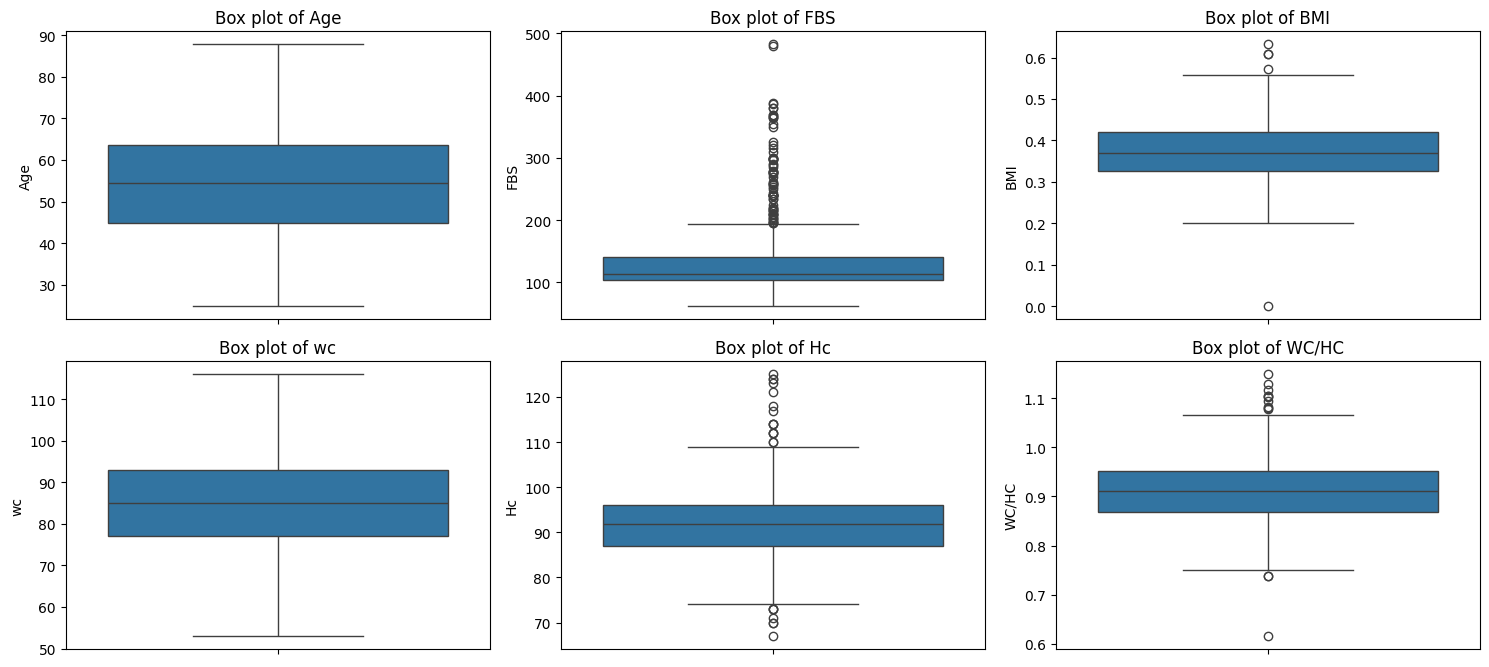

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for box plots
numerical_cols = merged_df.select_dtypes(include=np.number).columns

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=merged_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [67]:
def classify_diabetes_status(fbs):
    if fbs < 100:
        return 'Non-Diabetes'
    elif 100 <= fbs <= 125:
        return 'Pre-Diabetes'
    else:
        return 'Diabetes'

merged_df['Diabetes_Status'] = merged_df['FBS'].apply(classify_diabetes_status)
display(merged_df.head())

,Age,Sex,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Diabetes_Status
0,44.479124,F,159.0,0.535484,105.0,114.000000,0.921053,n,n,n,Diabetes
1,50.480493,M,205.6,0.417722,92.0,96.000000,0.958333,y,y,y,Diabetes
2,51.909651,M,240.0,0.450000,74.0,80.000000,0.925000,n,n,y,Diabetes
3,32.479124,M,129.0,0.506494,108.0,91.901709,0.911547,Unknown,Unknown,Unknown,Diabetes
4,72.479124,F,126.4,0.383562,88.0,91.901709,0.911547,y,Unknown,Unknown,Diabetes


In [68]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

merged_df_cleaned = remove_outliers_iqr(merged_df, 'Hc')
merged_df_cleaned = remove_outliers_iqr(merged_df_cleaned, 'WC/HC')

print("Original DataFrame shape:", merged_df.shape)
print("DataFrame shape after removing outliers:", merged_df_cleaned.shape)

# Update the merged_df to the cleaned version
merged_df = merged_df_cleaned

Original DataFrame shape: (530, 11)
DataFrame shape after removing outliers: (494, 11)


In [69]:
merged_df = pd.get_dummies(merged_df, columns=['Sex'], prefix='Sex', drop_first=True)
display(merged_df.head())

,Age,FBS,BMI,wc,Hc,WC/HC,Tobacco_current,Smoking_current,Alcohol,Diabetes_Status,Sex_F,Sex_M
1,50.480493,205.6,0.417722,92.0,96.000000,0.958333,y,y,y,Diabetes,False,True
2,51.909651,240.0,0.450000,74.0,80.000000,0.925000,n,n,y,Diabetes,False,True
3,32.479124,129.0,0.506494,108.0,91.901709,0.911547,Unknown,Unknown,Unknown,Diabetes,False,True
4,72.479124,126.4,0.383562,88.0,91.901709,0.911547,y,Unknown,Unknown,Diabetes,True,False
5,34.195756,134.8,0.434783,95.0,91.901709,0.911547,Unknown,Unknown,Unknown,Diabetes,False,True


In [70]:
from sklearn.model_selection import train_test_split

X = merged_df.drop('Diabetes_Status', axis=1)
y = merged_df['Diabetes_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns excluding 'Sex' which is already encoded
categorical_features = ['Tobacco_current', 'Smoking_current', 'Alcohol']

# Create a column transformer to apply one-hot encoding to the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Create a pipeline with the preprocessor and the Random Forest Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Diabetes       1.00      1.00      1.00        36
Non-Diabetes       1.00      0.64      0.78        11
Pre-Diabetes       0.93      1.00      0.96        52

    accuracy                           0.96        99
   macro avg       0.98      0.88      0.91        99
weighted avg       0.96      0.96      0.96        99


Confusion Matrix:
[[36  0  0]
 [ 0  7  4]
 [ 0  0 52]]


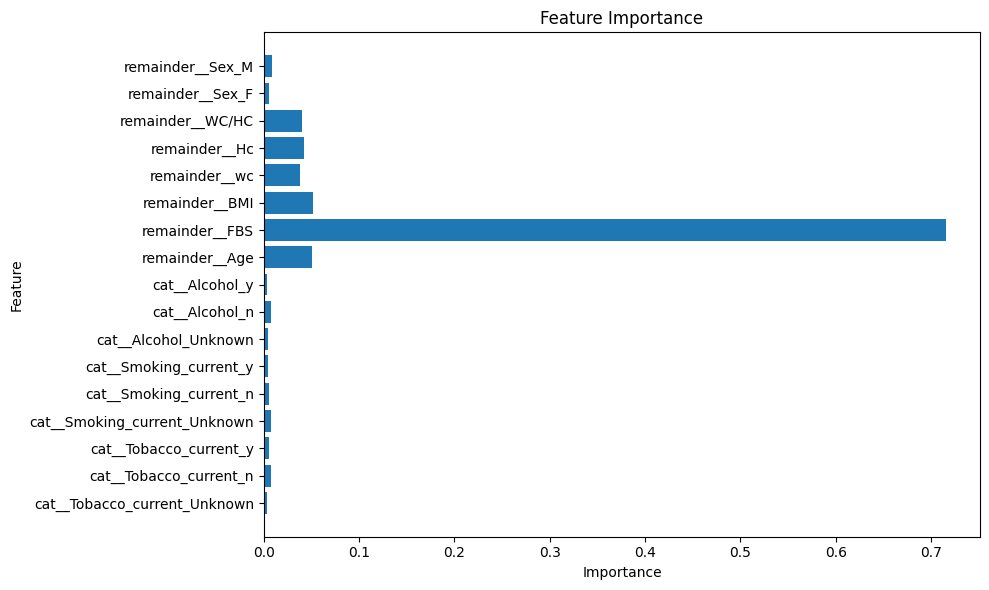

In [72]:
import matplotlib.pyplot as plt

# Access the trained Random Forest classifier from the pipeline
rf_classifier = model.named_steps['classifier']

# Get feature importances from the classifier
importances = rf_classifier.feature_importances_

# Get the preprocessor step from the pipeline
preprocessor = model.named_steps['preprocessor']

# Get the names of all features after the preprocessor
# This includes the one-hot encoded features and the passthrough features
all_feature_names = preprocessor.get_feature_names_out()

plt.figure(figsize=(10,6))
plt.barh(all_feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Define the features to use
selected_features = ['FBS', 'BMI', 'Age', 'wc', 'Hc']

# Select only the specified features from the training and testing data
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Since all selected features are numerical, we don't need a preprocessor with encoding
# Create a pipeline with only the Random Forest Classifier
model_rf_selected = RandomForestClassifier(random_state=42)

# Encode the target variable if it hasn't been encoded already
# Assuming label_encoder is already defined and fitted from previous steps
if 'label_encoder' not in locals():
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
else:
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)


# Train the model using the selected features and encoded target variable
model_rf_selected.fit(X_train_selected, y_train_encoded)

# Make predictions on the test set and decode the predictions back to original labels
y_pred_encoded_selected_rf = model_rf_selected.predict(X_test_selected)
y_pred_rf_selected = label_encoder.inverse_transform(y_pred_encoded_selected_rf)

# Evaluate the model
print("\nClassification Report (Random Forest with selected features):")
print(classification_report(y_test, y_pred_rf_selected))
print("\nConfusion Matrix (Random Forest with selected features):")
print(confusion_matrix(y_test, y_pred_rf_selected))


Classification Report (Random Forest with selected features):
              precision    recall  f1-score   support

    Diabetes       1.00      1.00      1.00        36
Non-Diabetes       1.00      0.82      0.90        11
Pre-Diabetes       0.96      1.00      0.98        52

    accuracy                           0.98        99
   macro avg       0.99      0.94      0.96        99
weighted avg       0.98      0.98      0.98        99


Confusion Matrix (Random Forest with selected features):
[[36  0  0]
 [ 0  9  2]
 [ 0  0 52]]


In [74]:
!pip install streamlit pyngrok


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import shap
import plotly.graph_objects as go

# -------------------- PAGE CONFIG --------------------
st.set_page_config(
    page_title="Diabetes Risk Predictor",
    page_icon="🩺",
    layout="wide",
    initial_sidebar_state="expanded"
)

# -------------------- CUSTOM CSS --------------------
st.markdown(
    """
    <style>
        /* General */
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        }
        
        /* Banner styling */
        .banner {
            background: linear-gradient(135deg, #1A5276, #154360);
            padding: 30px;
            border-radius: 18px;
            margin-bottom: 25px;
            text-align: center;
            box-shadow: 0px 4px 15px rgba(0,0,0,0.3);
        }
        .big-title {
            font-size: 42px !important;
            color: #FDFEFE;
            font-weight: 800;
            margin-bottom: 10px;
        }
        .subtitle {
            font-size: 18px;
            color: #D5DBDB;
            font-weight: 400;
        }

        /* Section titles */
        h3 {
            color: #154360 !important;
        }

        /* Metrics */
        [data-testid="stMetricValue"] {
            font-size: 20px;
            font-weight: bold;
        }
    </style>

    <div class="banner">
        <p class="big-title">🩺 Diabetes Risk Prediction Dashboard</p>
        <p class="subtitle">AI-powered prediction with SHAP explanations, risk visualization, and WHO-based health tips</p>
    </div>
    """,
    unsafe_allow_html=True
)

# -------------------- LOAD MODEL --------------------
model = joblib.load("random_forest_model.joblib")
label_encoder_classes = ['Diabetes', 'Non-Diabetes', 'Pre-Diabetes']

# -------------------- USER INPUT --------------------
st.markdown("### 📋 Patient Information")
col1, col2 = st.columns(2)

with col1:
    age = st.slider("Age", 18, 100, 50)
    sex = st.selectbox("Sex", ["Male", "Female"])   
    fbs = st.slider("Fasting Blood Sugar (mg/dL)", 50.0, 300.0, 100.0)
    bmi = st.slider("BMI (Body Mass Index)", 15.0, 50.0, 25.0)

with col2:
    wc = st.slider("Waist Circumference (cm)", 50.0, 150.0, 90.0)
    hc = st.slider("Hip Circumference (cm)", 70.0, 150.0, 100.0)
    smoking = st.selectbox("🚬 Tobacco Smoking", ["Yes", "No"])
    alcohol = st.selectbox("🍷 Alcohol Consumption", ["Yes", "No"])
    physical_activity = st.selectbox("🏃 Physical Activity Level", ["Low", "Moderate", "High"])
    family_history = st.selectbox("👨‍👩‍👧 Family History of Diabetes", ["Yes", "No"])

# Model input
features = np.array([[fbs, bmi, age, wc, hc]])
feature_names = ['FBS', 'BMI', 'Age', 'WC', 'HC']

# -------------------- PREDICTION --------------------
if st.button("🔍 Predict Now", use_container_width=True):
    prediction_encoded = model.predict(features)
    predicted_status = label_encoder_classes[prediction_encoded[0]]

    prediction_proba = model.predict_proba(features)
    max_prob = np.max(prediction_proba)

    # Risk Status
    if predicted_status == "Diabetes":
        risk_status = "Diabetes (High Risk)" if max_prob >= 0.7 else "Diabetes (Low Risk)"
    elif predicted_status == "Pre-Diabetes":
        risk_status = "Pre-Diabetes (High Risk)" if max_prob >= 0.6 else "Pre-Diabetes (Low Risk)"
    else:
        risk_status = "Non-Diabetes (Low Risk)"

    # -------------------- RESULTS --------------------
    st.markdown("## ✅ Prediction Results")
    st.success(f"**Predicted Status: {risk_status}**")

    st.markdown("### 📊 Prediction Probabilities")
    prob_cols = st.columns(len(label_encoder_classes))
    for i, class_name in enumerate(label_encoder_classes):
        prob_cols[i].metric(class_name, f"{prediction_proba[0][i]*100:.1f}%")

    # -------------------- GAUGE CHART --------------------
    st.markdown("### 📌 Risk Gauge")
    fig_gauge = go.Figure(go.Indicator(
        mode="gauge+number",
        value=max_prob * 100,
        title={'text': f"{risk_status}"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "black"},
            'steps': [
                {'range': [0, 40], 'color': "green"},
                {'range': [40, 70], 'color': "yellow"},
                {'range': [70, 100], 'color': "red"}
            ],
            'threshold': {
                'line': {'color': "blue", 'width': 4},
                'thickness': 0.75,
                'value': max_prob * 100
            }
        }
    ))
    st.plotly_chart(fig_gauge, use_container_width=True)

    # -------------------- EXPLANATION --------------------
    st.markdown("### 🔎 Key Factors Behind Prediction")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(features)

    try:
        shap_values_instance = shap_values[prediction_encoded[0]][0]
    except (IndexError, TypeError):
        try:
            shap_values_instance = shap_values[0, prediction_encoded[0], :]
        except Exception:
            shap_values_instance = None

    if shap_values_instance is not None:
        abs_vals = np.abs(shap_values_instance)
        percents = (abs_vals / np.sum(abs_vals)) * 100 if np.sum(abs_vals) > 0 else None

        if percents is not None:
            feature_pairs = sorted(zip(feature_names, percents), key=lambda x: x[1], reverse=True)
            labels = [f"{f} ({p:.1f}%)" for f, p in feature_pairs]
            values = [p for _, p in feature_pairs]

            fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
            fig.update_layout(title_text="Feature Contribution to Prediction")
            st.plotly_chart(fig, use_container_width=True)

    # -------------------- LIFESTYLE --------------------
    st.markdown("### 🧬 Patient Lifestyle Info (Not in Model)")
    st.info(f"""
    - Sex: **{sex}**
    - Tobacco Smoking: **{smoking}**
    - Alcohol Consumption: **{alcohol}**
    - Physical Activity: **{physical_activity}**
    - Family History of Diabetes: **{family_history}**
    """)

    # -------------------- HEALTH TIPS --------------------
    st.markdown("## 💡 Health Tips (WHO)")
    if "Diabetes" in risk_status:
        st.warning("""
        - Eat a balanced diet (fruits, vegetables, lean proteins).  
        - Stay active: 150 min/week moderate activity.  
        - Monitor sugar regularly & follow medication.  
        """)
    elif "Pre-Diabetes" in risk_status:
        st.warning("""
        - Reduce weight (5–10%).  
        - Avoid smoking, manage stress.  
        - Eat healthy & stay active.  
        """)
    else:
        st.success("""
        - Maintain your lifestyle: healthy eating, exercise, sleep.  
        - Regular check-ups for prevention.  
        """)

# -------------------- FOOTER --------------------
st.markdown("<hr>", unsafe_allow_html=True)
st.markdown(
    "<p style='text-align:center;color:gray;'>✨ Built with ❤️ using <b>Streamlit, Scikit-learn, SHAP & Plotly</b></p>",
    unsafe_allow_html=True
)


Writing app.py


In [41]:
!streamlit run app.py &>/content/logs.txt &

OSError: Background processes not supported.

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLuoBgC5d5lw4v0CXLyyRtPvd_3wzqKYtJdT8pmaWYwH5o1")

In [100]:
from pyngrok import ngrok

from pyngrok import ngrok

#expose the steamlit server running on port 8501
public_url = ngrok.connect(8501)
print(f"streamlit App is live at:{public_url}")

t=2025-08-22T21:06:46+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
t=2025-08-22T21:06:46+0530 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration fil

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [92]:
!pkill -f ngrok

'pkill' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
import joblib

# Save the trained Random Forest model to the /content/ directory
joblib.dump(model_rf_selected, "random_forest_model.joblib")

print("Random Forest model saved as 'random_forest_model.joblib'")

Random Forest model saved as 'random_forest_model.joblib'
